In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

#Zbiór wygenerowany jak w pliku create_matrix_from_files, ale zawierający wszystkie kolumny
df = pd.read_csv("probna3.csv")

## IPCA (Incremental PCA):
Zamiennik PCA przy dużych zbiorach - robi mądrzej z pamięcią. Z tego co widzę to dzieli na warstwy (batch_size). <br>
Przy małych zbiorach pewnie nie będzie różnicy, ale przy większym wyniki mogą być już różne.

In [2]:
def ipca_fun(data, n_components, batch_size):

    #Usuwam nazwy plikow i kraje:
    df_new=df.iloc[:,1:df.shape[1]-1]
    
    ipca = IncrementalPCA(n_components=2, batch_size=12)
    #n_components - do ilu wymiarów redukujemy (głupio, bo 2 to głupio, ale chciałam narysować)
    #batch_size - chyba ile obserwacji na raz w pamięci mieli jednocześnie? 
    ipca.fit(df_new)
    
    return(pd.DataFrame(ipca.transform(df_new)))

In [3]:
new_data = ipca_fun(df,2,6)
new_data

,0,1
0,-484.427470,84.060617
1,289.915059,-294.313305
2,-379.423460,55.537627
3,893.348496,367.193573
4,742.115733,110.192351
5,377.847713,-336.717287
6,-154.859690,116.156882
7,-121.355554,-84.628392
8,-602.516817,100.877866
9,-463.382337,46.116848


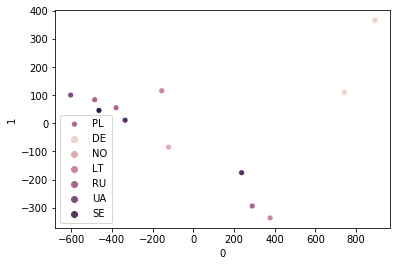

In [4]:
def ipca_plot2(df, batch_size):
    '''
    Wykres w przypadku redukcji do dwóch wymiarów
    '''
    new_data = ipca_fun(df,2,batch_size)
    
    #Zmieniam kody państw na liczby(kolory)
    le = preprocessing.LabelEncoder()
    le.fit(df["@C#ountry"])
    
    colors =  le.transform(df["@C#ountry"])

    scatt = sns.scatterplot(x=new_data[0], y=new_data[1], hue=colors, legend ="full")
    plt.legend(labels = df["@C#ountry"].unique())
    
ipca_plot2(df,6)